# 분류나무 예시

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # version 0.11.0
sns.__version__ 

'0.12.2'

In [5]:
!pip install --upgrade seaborn

In [10]:
df1 = pd.read_csv(r'C:\Users\Desktop\sample1.csv')
X = df1.drop('y', axis=1) 
y = df1['y']
X,y,df1

(          x1    x2
 0    1.76405 -0.37
 1    0.40016 -0.24
 2    0.97874  1.10
 3    2.24089  0.66
 4    1.86756  0.64
 ..       ...   ...
 195 -0.17155 -0.76
 196  0.77179  0.86
 197  0.82350  1.14
 198  2.16324  1.47
 199  1.33653  0.85
 
 [200 rows x 2 columns],
 0      1.0
 1      0.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 195    0.0
 196    1.0
 197    1.0
 198    1.0
 199    1.0
 Name: y, Length: 200, dtype: float64,
           x1    x2    y
 0    1.76405 -0.37  1.0
 1    0.40016 -0.24  0.0
 2    0.97874  1.10  1.0
 3    2.24089  0.66  1.0
 4    1.86756  0.64  1.0
 ..       ...   ...  ...
 195 -0.17155 -0.76  0.0
 196  0.77179  0.86  1.0
 197  0.82350  1.14  1.0
 198  2.16324  1.47  1.0
 199  1.33653  0.85  1.0
 
 [200 rows x 3 columns])

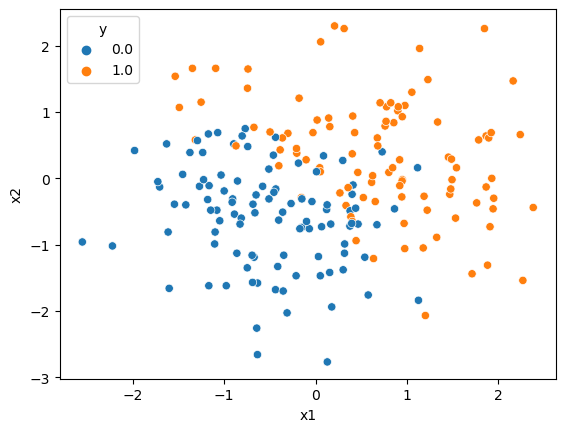

In [11]:
sns.scatterplot(data=df1, x='x1', y='x2', hue='y')#, palette="Set2")
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
c_tree = DecisionTreeClassifier(min_impurity_decrease=0.05,random_state=0)
c_tree.fit(X, y)

DecisionTreeClassifier(min_impurity_decrease=0.05, random_state=0)

### 나무 모형

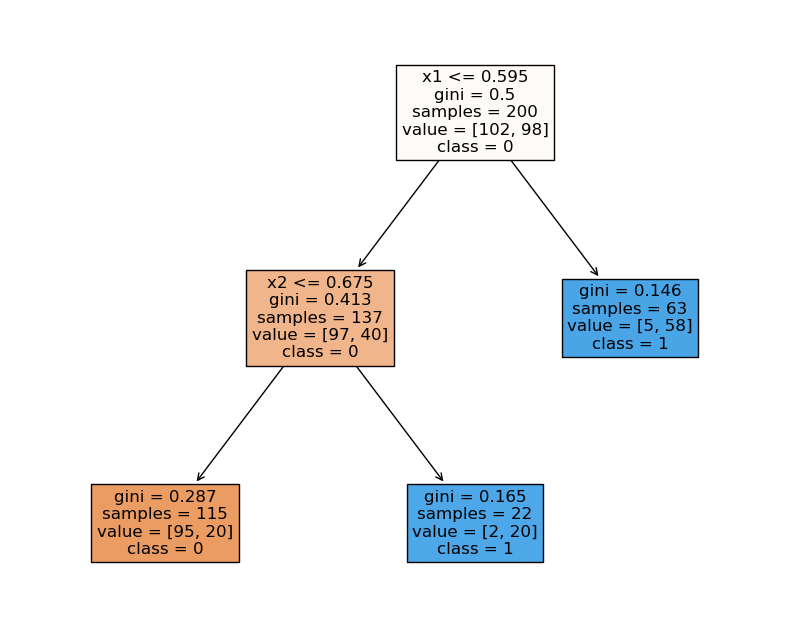

In [13]:
xname = X.columns
yname = ['0','1']
plt.figure(figsize=(10,8))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

# 분류나무 예제 (구매여부 데이터)

In [15]:
direct2 = pd.read_csv(r'C:\Users\Desktop\direct2.csv')
direct2

,Buy,Age,Gender,Married,Children,Income,Ccard,Recent,Climate,Urban
0,0,71.0,0,1.0,1,486,1,1,17,1
1,1,53.0,0,1.0,3,620,2,0,20,0
2,0,53.0,1,1.0,0,694,5,1,18,1
3,0,45.0,1,0.0,0,582,3,1,15,1
4,1,32.0,1,0.0,0,419,5,0,16,1
...,...,...,...,...,...,...,...,...,...,...
9995,1,41.0,1,1.0,2,674,1,0,16,1
9996,0,54.0,0,1.0,1,576,1,1,14,1
9997,0,47.0,1,0.0,0,589,6,0,15,1
9998,1,51.0,1,1.0,1,556,2,1,17,1


In [18]:
direct2 = direct2.dropna()
print(direct2.isnull().sum())
X = direct2.drop('Buy',axis = 'columns')
y = direct2['Buy']

Buy         0
Age         0
Gender      0
Married     0
Children    0
Income      0
Ccard       0
Recent      0
Climate     0
Urban       0
dtype: int64


0       0
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    0
Name: Buy, Length: 9766, dtype: int64

### 분류나무 모형

In [19]:
model_tree = DecisionTreeClassifier(max_depth=2,random_state=0)
model_tree.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=0)

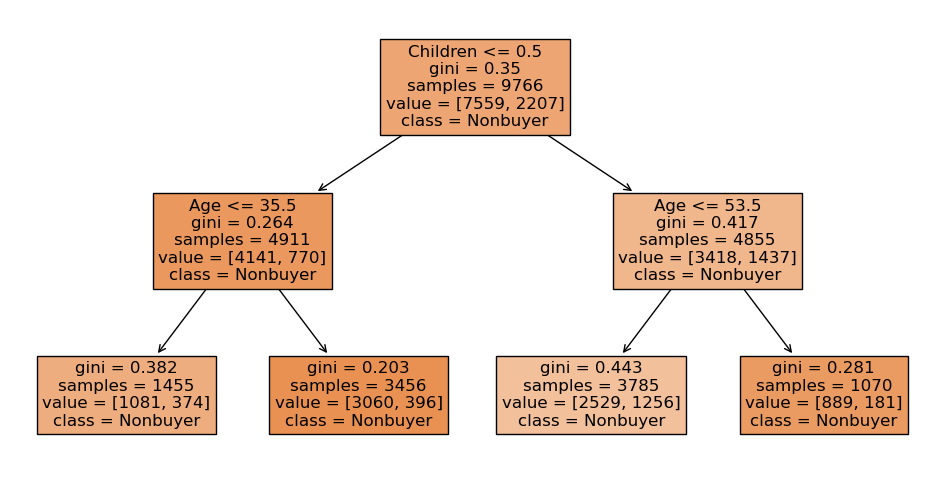

In [20]:
plt.figure(figsize=(12, 6))
xname = X.columns
yname = ['Nonbuyer','Buyer']
plot_tree(model_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()

# 회귀나무 예시

C:\Users\hopio\AppData\Local\Temp\ipykernel_21820\2509810202.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df2, x='x', y='y', palette="Set2")


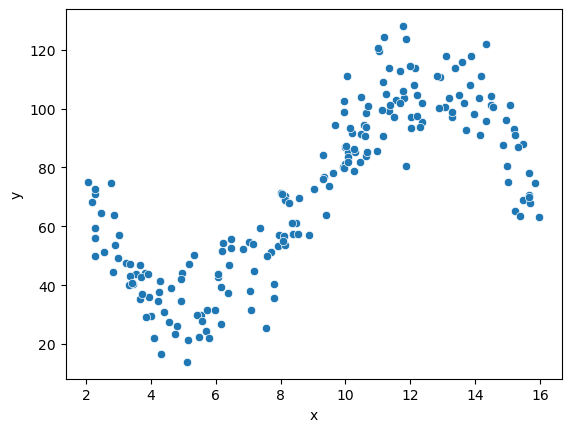

In [25]:
df2 = pd.read_csv(r'C:\Users\\Desktop\sample2.csv')
X = df2.drop('y', axis=1)
y = df2['y']
sns.scatterplot(data=df2, x='x', y='y', palette="Set2")
plt.show()

In [26]:
from sklearn.tree import DecisionTreeRegressor
r_tree = DecisionTreeRegressor(min_impurity_decrease=10, random_state=0) 
r_tree.fit(X, y)

DecisionTreeRegressor(min_impurity_decrease=10, random_state=0)

### 나무 모형

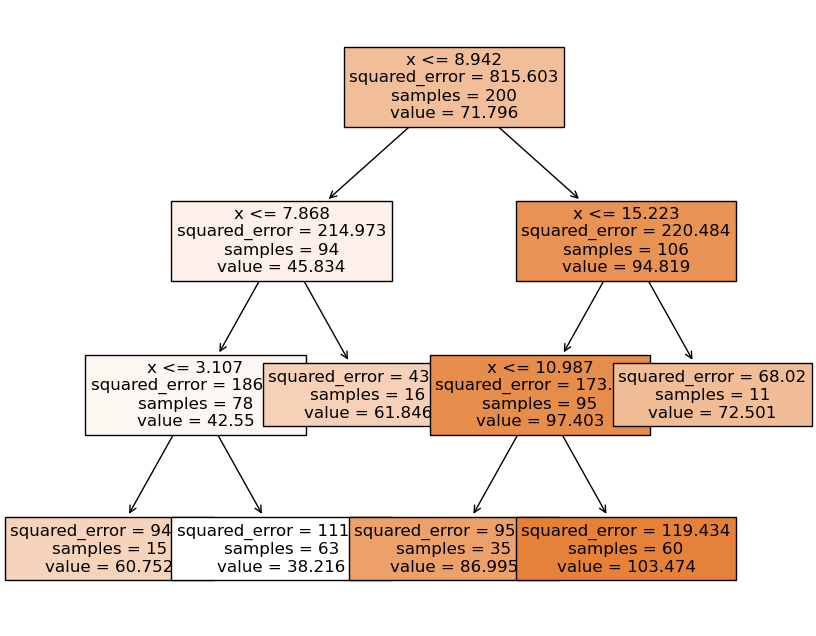

In [29]:
plt.figure(figsize=(10,8))
xname = X.columns
plot_tree(r_tree, feature_names=xname, filled=True, fontsize=12) 
plt.show()

# 회귀나무 예제 (CAT 점수 데이터)

In [31]:
df=pd.read_csv('copdcat.csv' ,header=0)
X=df.drop(["CATScore"],axis=1)
y=df["CATScore"]

,age,sex,FEV1%,Smoke_pack_year,Chol,Comorbid,premium,CATScore
0,53,1,74.13,9.2,170.83,1,59649,7.8
1,48,1,53.24,0.0,168.82,0,47348,9.1
2,55,1,70.39,16.3,193.98,0,49599,7.6
3,62,0,69.87,44.8,215.33,1,58428,14.5
4,48,1,76.41,32.8,184.65,1,50806,11.1
...,...,...,...,...,...,...,...,...
5246,45,1,53.32,0.0,241.90,1,45933,7.1
5247,37,0,57.03,44.4,182.58,0,38004,16.8
5248,56,0,50.61,18.6,198.92,0,66896,7.3
5249,53,1,63.59,45.3,206.71,1,67557,12.2


### 회귀나무 모형

In [ ]:
model_tree = DecisionTreeRegressor(max_depth=2, random_state=0)
fit_tree = model_tree.fit(X, y)

In [ ]:
plt.figure(figsize=(10, 6))
xname = X.columns
plot_tree(fit_tree, feature_names=xname, filled=True, fontsize=12) 
plt.show()